## Importing packeges

In [1]:
from ising_lib import *
from numpy import *
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
%matplotlib inline

def variance(X):
    return var(X)

def Average(X):
    return average(X)
    
    
    
def analyze(temparature,L,E,M):
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err]

/home/aravind/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## VERIFICATION FOR ALGOS

### READING FROM FILE TO VERIFY

In [51]:
f=open('serccpp/fnames','r')
fnames=[]
l=f.readline()
while l:
    fnames.append('serccpp/'+l[:-1])
    l=f.readline()
f.close()
print(len(fnames))

1149


## EXTRACTING FROM MCMC DATA

In [56]:
ml=10000
sampled=[]
analy=dict()
i=-1
extracted_vals=dict()
rslt=open('cppanalysis/result_ising_all_2','w')
cfit=open('cppanalysis/cfit_ising_all_2','w')
rslt.write('Temp,N,Magetization,MagErr,Specific_Heat,SP_Err,Succeptibility,succepErr\n')
cfit.write('N,temp,Xi,Xi_err\n')
l=len(fnames)
for fn in fnames:
    i+=1
    dat=get_data(fn);
    try:
        L=dat['params']['length of lattice  '];
    except:
        L=dat['params']['N '];    
    try:
        T=dat['params']['T   '];
    except:
        T=dat['params']['T '];    
    if T<0.75:
        continue
    if L not in extracted_vals.keys():
        extracted_vals.update({L:{'T':[],'mag':[],'mag_err':[],'sp_heat':[],'sp_heat_err':[],
                                  'sucep':[],'sucep_err':[]}})
    
    print("Doing ",i+1,"/",l, " L : ",L," T : ",T,"   ",fn)
    N=L*L
    sdata=sample_data(dat,Max_lags=ml);
    analy=analyze(T,N,sdata['energy'],sdata['magentization'])
    extracted_vals[L]['T'].append(T)
    extracted_vals[L]['mag'].append(analy[0][0])
    extracted_vals[L]['mag_err'].append(analy[0][1])
    extracted_vals[L]['sp_heat'].append(analy[1][0])
    extracted_vals[L]['sp_heat_err'].append(analy[1][1])
    extracted_vals[L]['sucep'].append(analy[2][0]*N)
    extracted_vals[L]['sucep_err'].append(analy[2][1]*N)
    rslt.write(str(T)+","+str(L)+","+str(analy[0][0])+","+str(analy[0][1]))
    rslt.write(","+str(analy[1][0])+","+str(analy[1][1]))
    rslt.write(","+str(analy[2][0]*N)+","+str(analy[2][1]*N)+"\n")
    cfit.write(str(L)+","+str(T)+","+str(analy[2][0])+","+str(analy[2][1])+"\n")
rslt.close()
cfit.close()

Doing  1 / 1149  L :  10  T :  0.8     serccpp/N_10_T_0.800_ising.txt
Doing  2 / 1149  L :  10  T :  1     serccpp/N_10_T_1.000_ising.txt
Doing  3 / 1149  L :  10  T :  1.2     serccpp/N_10_T_1.200_ising.txt
Doing  4 / 1149  L :  10  T :  1.4     serccpp/N_10_T_1.400_ising.txt
Doing  5 / 1149  L :  10  T :  1.6     serccpp/N_10_T_1.600_ising.txt
Doing  6 / 1149  L :  10  T :  1.62     serccpp/N_10_T_1.620_ising.txt
Doing  7 / 1149  L :  10  T :  1.64     serccpp/N_10_T_1.640_ising.txt
Doing  8 / 1149  L :  10  T :  1.66     serccpp/N_10_T_1.660_ising.txt
Doing  9 / 1149  L :  10  T :  1.68     serccpp/N_10_T_1.680_ising.txt
Doing  10 / 1149  L :  10  T :  1.7     serccpp/N_10_T_1.700_ising.txt
Doing  11 / 1149  L :  10  T :  1.72     serccpp/N_10_T_1.720_ising.txt
Doing  12 / 1149  L :  10  T :  1.74     serccpp/N_10_T_1.740_ising.txt
Doing  13 / 1149  L :  10  T :  1.76     serccpp/N_10_T_1.760_ising.txt
Doing  14 / 1149  L :  10  T :  1.78     serccpp/N_10_T_1.780_ising.txt
Doing  15

Doing  116 / 1149  L :  12  T :  1.84     serccpp/N_12_T_1.840_ising.txt
Doing  117 / 1149  L :  12  T :  1.86     serccpp/N_12_T_1.860_ising.txt
Doing  118 / 1149  L :  12  T :  1.88     serccpp/N_12_T_1.880_ising.txt
Doing  119 / 1149  L :  12  T :  1.9     serccpp/N_12_T_1.900_ising.txt
Doing  120 / 1149  L :  12  T :  1.92     serccpp/N_12_T_1.920_ising.txt
Doing  121 / 1149  L :  12  T :  1.94     serccpp/N_12_T_1.940_ising.txt
Doing  122 / 1149  L :  12  T :  1.96     serccpp/N_12_T_1.960_ising.txt
Doing  123 / 1149  L :  12  T :  1.98     serccpp/N_12_T_1.980_ising.txt
Doing  124 / 1149  L :  12  T :  2     serccpp/N_12_T_2.000_ising.txt
Doing  125 / 1149  L :  12  T :  2.02     serccpp/N_12_T_2.020_ising.txt
Doing  126 / 1149  L :  12  T :  2.04     serccpp/N_12_T_2.040_ising.txt
Doing  127 / 1149  L :  12  T :  2.06     serccpp/N_12_T_2.060_ising.txt
Doing  128 / 1149  L :  12  T :  2.08     serccpp/N_12_T_2.080_ising.txt
Doing  129 / 1149  L :  12  T :  2.1     serccpp/N_12_T

Doing  230 / 1149  L :  14  T :  2.14     serccpp/N_14_T_2.140_ising.txt
Doing  231 / 1149  L :  14  T :  2.16     serccpp/N_14_T_2.160_ising.txt
Doing  232 / 1149  L :  14  T :  2.18     serccpp/N_14_T_2.180_ising.txt
Doing  233 / 1149  L :  14  T :  2.2     serccpp/N_14_T_2.200_ising.txt
Doing  234 / 1149  L :  14  T :  2.22     serccpp/N_14_T_2.220_ising.txt
Doing  235 / 1149  L :  14  T :  2.24     serccpp/N_14_T_2.240_ising.txt
Doing  236 / 1149  L :  14  T :  2.26     serccpp/N_14_T_2.260_ising.txt
Doing  237 / 1149  L :  14  T :  2.28     serccpp/N_14_T_2.280_ising.txt
Doing  238 / 1149  L :  14  T :  2.3     serccpp/N_14_T_2.300_ising.txt
Doing  239 / 1149  L :  14  T :  2.32     serccpp/N_14_T_2.320_ising.txt
Doing  240 / 1149  L :  14  T :  2.34     serccpp/N_14_T_2.340_ising.txt
Doing  241 / 1149  L :  14  T :  2.36     serccpp/N_14_T_2.360_ising.txt
Doing  242 / 1149  L :  14  T :  2.38     serccpp/N_14_T_2.380_ising.txt
Doing  243 / 1149  L :  14  T :  2.4     serccpp/N_14

Doing  343 / 1149  L :  16  T :  2.42     serccpp/N_16_T_2.420_ising.txt
Doing  344 / 1149  L :  16  T :  2.44     serccpp/N_16_T_2.440_ising.txt
Doing  345 / 1149  L :  16  T :  2.46     serccpp/N_16_T_2.460_ising.txt
Doing  346 / 1149  L :  16  T :  2.48     serccpp/N_16_T_2.480_ising.txt
Doing  347 / 1149  L :  16  T :  2.5     serccpp/N_16_T_2.500_ising.txt
Doing  348 / 1149  L :  16  T :  2.52     serccpp/N_16_T_2.520_ising.txt
Doing  349 / 1149  L :  16  T :  2.54     serccpp/N_16_T_2.540_ising.txt
Doing  350 / 1149  L :  16  T :  2.56     serccpp/N_16_T_2.560_ising.txt
Doing  351 / 1149  L :  16  T :  2.58     serccpp/N_16_T_2.580_ising.txt
Doing  352 / 1149  L :  16  T :  2.6     serccpp/N_16_T_2.600_ising.txt
Doing  353 / 1149  L :  16  T :  2.62     serccpp/N_16_T_2.620_ising.txt
Doing  354 / 1149  L :  16  T :  2.64     serccpp/N_16_T_2.640_ising.txt
Doing  355 / 1149  L :  16  T :  2.66     serccpp/N_16_T_2.660_ising.txt
Doing  356 / 1149  L :  16  T :  2.68     serccpp/N_1

Doing  457 / 1149  L :  18  T :  2.72     serccpp/N_18_T_2.720_ising.txt
Doing  458 / 1149  L :  18  T :  2.74     serccpp/N_18_T_2.740_ising.txt
Doing  459 / 1149  L :  18  T :  2.76     serccpp/N_18_T_2.760_ising.txt
Doing  460 / 1149  L :  18  T :  2.78     serccpp/N_18_T_2.780_ising.txt
Doing  461 / 1149  L :  18  T :  2.8     serccpp/N_18_T_2.800_ising.txt
Doing  462 / 1149  L :  18  T :  2.82     serccpp/N_18_T_2.820_ising.txt
Doing  463 / 1149  L :  18  T :  2.84     serccpp/N_18_T_2.840_ising.txt
Doing  464 / 1149  L :  18  T :  2.86     serccpp/N_18_T_2.860_ising.txt
Doing  465 / 1149  L :  18  T :  2.88     serccpp/N_18_T_2.880_ising.txt
Doing  466 / 1149  L :  18  T :  2.9     serccpp/N_18_T_2.900_ising.txt
Doing  467 / 1149  L :  18  T :  2.92     serccpp/N_18_T_2.920_ising.txt
Doing  468 / 1149  L :  18  T :  2.94     serccpp/N_18_T_2.940_ising.txt
Doing  469 / 1149  L :  18  T :  2.96     serccpp/N_18_T_2.960_ising.txt
Doing  470 / 1149  L :  18  T :  2.98     serccpp/N_1

Doing  570 / 1149  L :  22  T :  1.8     serccpp/N_22_T_1.800_ising.txt
Doing  571 / 1149  L :  22  T :  1.82     serccpp/N_22_T_1.820_ising.txt
Doing  572 / 1149  L :  22  T :  1.84     serccpp/N_22_T_1.840_ising.txt
Doing  573 / 1149  L :  22  T :  1.86     serccpp/N_22_T_1.860_ising.txt
Doing  574 / 1149  L :  22  T :  1.88     serccpp/N_22_T_1.880_ising.txt
Doing  575 / 1149  L :  22  T :  1.9     serccpp/N_22_T_1.900_ising.txt
Doing  576 / 1149  L :  22  T :  1.92     serccpp/N_22_T_1.920_ising.txt
Doing  577 / 1149  L :  22  T :  1.94     serccpp/N_22_T_1.940_ising.txt
Doing  578 / 1149  L :  22  T :  1.96     serccpp/N_22_T_1.960_ising.txt
Doing  579 / 1149  L :  22  T :  1.98     serccpp/N_22_T_1.980_ising.txt
Doing  580 / 1149  L :  22  T :  2     serccpp/N_22_T_2.000_ising.txt
Doing  581 / 1149  L :  22  T :  2.02     serccpp/N_22_T_2.020_ising.txt
Doing  582 / 1149  L :  22  T :  2.04     serccpp/N_22_T_2.040_ising.txt
Doing  583 / 1149  L :  22  T :  2.06     serccpp/N_22_T

Doing  684 / 1149  L :  24  T :  2.1     serccpp/N_24_T_2.100_ising.txt
Doing  685 / 1149  L :  24  T :  2.12     serccpp/N_24_T_2.120_ising.txt
Doing  686 / 1149  L :  24  T :  2.14     serccpp/N_24_T_2.140_ising.txt
Doing  687 / 1149  L :  24  T :  2.16     serccpp/N_24_T_2.160_ising.txt
Doing  688 / 1149  L :  24  T :  2.18     serccpp/N_24_T_2.180_ising.txt
Doing  689 / 1149  L :  24  T :  2.2     serccpp/N_24_T_2.200_ising.txt
Doing  690 / 1149  L :  24  T :  2.22     serccpp/N_24_T_2.220_ising.txt
Doing  691 / 1149  L :  24  T :  2.24     serccpp/N_24_T_2.240_ising.txt
Doing  692 / 1149  L :  24  T :  2.26     serccpp/N_24_T_2.260_ising.txt
Doing  693 / 1149  L :  24  T :  2.28     serccpp/N_24_T_2.280_ising.txt
Doing  694 / 1149  L :  24  T :  2.3     serccpp/N_24_T_2.300_ising.txt
Doing  695 / 1149  L :  24  T :  2.32     serccpp/N_24_T_2.320_ising.txt
Doing  696 / 1149  L :  24  T :  2.34     serccpp/N_24_T_2.340_ising.txt
Doing  697 / 1149  L :  24  T :  2.36     serccpp/N_24

Doing  798 / 1149  L :  26  T :  2.4     serccpp/N_26_T_2.400_ising.txt
Doing  799 / 1149  L :  26  T :  2.42     serccpp/N_26_T_2.420_ising.txt
Doing  800 / 1149  L :  26  T :  2.44     serccpp/N_26_T_2.440_ising.txt
Doing  801 / 1149  L :  26  T :  2.46     serccpp/N_26_T_2.460_ising.txt
Doing  802 / 1149  L :  26  T :  2.48     serccpp/N_26_T_2.480_ising.txt
Doing  803 / 1149  L :  26  T :  2.5     serccpp/N_26_T_2.500_ising.txt
Doing  804 / 1149  L :  26  T :  2.52     serccpp/N_26_T_2.520_ising.txt
Doing  805 / 1149  L :  26  T :  2.54     serccpp/N_26_T_2.540_ising.txt
Doing  806 / 1149  L :  26  T :  2.56     serccpp/N_26_T_2.560_ising.txt
Doing  807 / 1149  L :  26  T :  2.58     serccpp/N_26_T_2.580_ising.txt
Doing  808 / 1149  L :  26  T :  2.6     serccpp/N_26_T_2.600_ising.txt
Doing  809 / 1149  L :  26  T :  2.62     serccpp/N_26_T_2.620_ising.txt
Doing  810 / 1149  L :  26  T :  2.64     serccpp/N_26_T_2.640_ising.txt
Doing  811 / 1149  L :  26  T :  2.66     serccpp/N_26

Doing  912 / 1149  L :  28  T :  2.7     serccpp/N_28_T_2.700_ising.txt
Doing  913 / 1149  L :  28  T :  2.72     serccpp/N_28_T_2.720_ising.txt
Doing  914 / 1149  L :  28  T :  2.74     serccpp/N_28_T_2.740_ising.txt
Doing  915 / 1149  L :  28  T :  2.76     serccpp/N_28_T_2.760_ising.txt
Doing  916 / 1149  L :  28  T :  2.78     serccpp/N_28_T_2.780_ising.txt
Doing  917 / 1149  L :  28  T :  2.8     serccpp/N_28_T_2.800_ising.txt
Doing  918 / 1149  L :  28  T :  2.82     serccpp/N_28_T_2.820_ising.txt
Doing  919 / 1149  L :  28  T :  2.84     serccpp/N_28_T_2.840_ising.txt
Doing  920 / 1149  L :  28  T :  2.86     serccpp/N_28_T_2.860_ising.txt
Doing  921 / 1149  L :  28  T :  2.88     serccpp/N_28_T_2.880_ising.txt
Doing  922 / 1149  L :  28  T :  2.9     serccpp/N_28_T_2.900_ising.txt
Doing  923 / 1149  L :  28  T :  2.92     serccpp/N_28_T_2.920_ising.txt
Doing  924 / 1149  L :  28  T :  2.94     serccpp/N_28_T_2.940_ising.txt
Doing  925 / 1149  L :  28  T :  2.96     serccpp/N_28

Doing  1025 / 1149  L :  30  T :  2.98     serccpp/N_30_T_2.980_ising.txt
Doing  1026 / 1149  L :  30  T :  3     serccpp/N_30_T_3.000_ising.txt
Doing  1027 / 1149  L :  30  T :  3.1     serccpp/N_30_T_3.100_ising.txt
Doing  1028 / 1149  L :  30  T :  3.2     serccpp/N_30_T_3.200_ising.txt
Doing  1029 / 1149  L :  30  T :  3.3     serccpp/N_30_T_3.300_ising.txt
Doing  1030 / 1149  L :  30  T :  3.4     serccpp/N_30_T_3.400_ising.txt
Doing  1031 / 1149  L :  30  T :  3.5     serccpp/N_30_T_3.500_ising.txt
Doing  1032 / 1149  L :  30  T :  3.6     serccpp/N_30_T_3.600_ising.txt
Doing  1033 / 1149  L :  30  T :  3.7     serccpp/N_30_T_3.700_ising.txt
Doing  1034 / 1149  L :  30  T :  3.8     serccpp/N_30_T_3.800_ising.txt
Doing  1035 / 1149  L :  30  T :  3.9     serccpp/N_30_T_3.900_ising.txt
Doing  1036 / 1149  L :  30  T :  4     serccpp/N_30_T_4.000_ising.txt
Doing  1037 / 1149  L :  30  T :  4.1     serccpp/N_30_T_4.100_ising.txt
Doing  1038 / 1149  L :  30  T :  4.3     serccpp/N_30

Doing  1138 / 1149  L :  32  T :  4.4     serccpp/N_32_T_4.400_ising.txt
Doing  1139 / 1149  L :  32  T :  4.5     serccpp/N_32_T_4.500_ising.txt
Doing  1140 / 1149  L :  32  T :  4.6     serccpp/N_32_T_4.600_ising.txt
Doing  1141 / 1149  L :  32  T :  4.7     serccpp/N_32_T_4.700_ising.txt
Doing  1142 / 1149  L :  32  T :  4.8     serccpp/N_32_T_4.800_ising.txt
Doing  1143 / 1149  L :  32  T :  4.9     serccpp/N_32_T_4.900_ising.txt
Doing  1144 / 1149  L :  32  T :  5     serccpp/N_32_T_5.000_ising.txt
Doing  1145 / 1149  L :  32  T :  5.1     serccpp/N_32_T_5.100_ising.txt
Doing  1146 / 1149  L :  32  T :  5.2     serccpp/N_32_T_5.200_ising.txt
Doing  1147 / 1149  L :  32  T :  5.3     serccpp/N_32_T_5.300_ising.txt
Doing  1148 / 1149  L :  32  T :  5.4     serccpp/N_32_T_5.400_ising.txt
Doing  1149 / 1149  L :  32  T :  5.5     serccpp/N_32_T_5.500_ising.txt


## READING THE EXTRACTED DATA FOR DIFFERENT RANDOM ENGINE

In [2]:
f=open('cppanalysis/result_misner','r')
X=True
while(X):
    X=False
    extracted_vals=dict()
    l=f.readline()
    l=f.readline()
    i=0
    while l:
        i+=1
        try:
            it=l[:-1].split(',')
    #         print(it)
            L=int(it[1])
            if L not in extracted_vals.keys():
                extracted_vals.update({L:{'T':[],'mag':[],'mag_err':[],'sp_heat':[],'sp_heat_err':[],
                                          'sucep':[],'sucep_err':[]}})
            extracted_vals[L]['T'].append(float(it[0]))
            extracted_vals[L]['mag'].append(float(it[2]))
            extracted_vals[L]['mag_err'].append(float(it[3]))
            extracted_vals[L]['sp_heat'].append(float(it[4]))
            extracted_vals[L]['sp_heat_err'].append(float(it[5]))
            extracted_vals[L]['sucep'].append(float(it[6]))
            extracted_vals[L]['sucep_err'].append(float(it[7]))
            l=f.readline()
        except:
            print(it)
            l=f.readline()
    f.close()
    print(i)
    
f=open('cppanalysis/result_rand','r')
X=True
while(X):
    X=False
    extracted_vals_rand=dict()
    l=f.readline()
    l=f.readline()
    i=0
    while l:
        i+=1
        try:
            it=l[:-1].split(',')
    #         print(it)
            L=int(it[1])
            if L not in extracted_vals_rand.keys():
                extracted_vals_rand.update({L:{'T':[],'mag':[],'mag_err':[],'sp_heat':[],'sp_heat_err':[],
                                          'sucep':[],'sucep_err':[]}})
            extracted_vals_rand[L]['T'].append(float(it[0]))
            extracted_vals_rand[L]['mag'].append(float(it[2]))
            extracted_vals_rand[L]['mag_err'].append(float(it[3]))
            extracted_vals_rand[L]['sp_heat'].append(float(it[4]))
            extracted_vals_rand[L]['sp_heat_err'].append(float(it[5]))
            extracted_vals_rand[L]['sucep'].append(float(it[6]))
            extracted_vals_rand[L]['sucep_err'].append(float(it[7]))
            l=f.readline()
        except:
            print(it)
            l=f.readline()
    f.close()
    print(i)

22
22


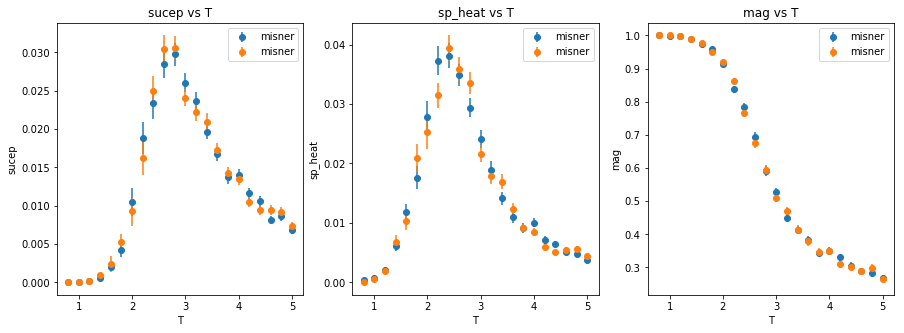

In [31]:
f,ax=plt.subplots(ncols=3,nrows=1,figsize=(15,5))
t=True
while t:
    t=False
    lbl='sucep'
    for i in extracted_vals.keys():
        Y=[(k/i**2) for k in extracted_vals[i][lbl]]
        Y_err=[(k/i**2) for k in extracted_vals[i][lbl+"_err"]]
        ax[0].errorbar(extracted_vals[i]['T'],Y,Y_err,fmt='o',label='misner')
        ax[0].set_xlabel('T')
        ax[0].set_ylabel(lbl)
        ax[0].set_title(lbl+ " vs T")
        ax[0].legend(loc=0)
    lbl="sp_heat"
    for i in extracted_vals.keys():
        Y=[(k/i**2) for k in extracted_vals[i][lbl]]
        Y_err=[(k/i**2) for k in extracted_vals[i][lbl+"_err"]]
        ax[1].errorbar(extracted_vals[i]['T'],Y,Y_err,fmt='o',label='misner')
        ax[1].set_xlabel('T')
        ax[1].set_ylabel(lbl)
        ax[1].set_title(lbl+ " vs T")
        ax[1].legend(loc=0)
    lbl="mag"
    for i in extracted_vals.keys():
        Y=[(k/i**2) for k in extracted_vals[i][lbl]]
        Y_err=[(k/i**2) for k in extracted_vals[i][lbl+"_err"]]
        ax[2].errorbar(extracted_vals[i]['T'],Y,Y_err,fmt='o',label='misner')
        ax[2].set_xlabel('T')
        ax[2].set_ylabel(lbl)
        ax[2].set_title(lbl+ " vs T")
        ax[2].legend(loc=0)

    lbl='sucep'
    for i in extracted_vals_rand.keys():
        Y=[(k/i**2) for k in extracted_vals_rand[i][lbl]]
        Y_err=[(k/i**2) for k in extracted_vals_rand[i][lbl+"_err"]]
        ax[0].errorbar(extracted_vals_rand[i]['T'],Y,Y_err,fmt='o',label='misner')
        ax[0].set_xlabel('T')
        ax[0].set_ylabel(lbl)
        ax[0].set_title(lbl+ " vs T")
        ax[0].legend(loc=0)
    lbl="sp_heat"
    for i in extracted_vals_rand.keys():
        Y=[(k/i**2) for k in extracted_vals_rand[i][lbl]]
        Y_err=[(k/i**2) for k in extracted_vals_rand[i][lbl+"_err"]]
        ax[1].errorbar(extracted_vals[i]['T'],Y,Y_err,fmt='o',label='misner')
        ax[1].set_xlabel('T')
        ax[1].set_ylabel(lbl)
        ax[1].set_title(lbl+ " vs T")
        ax[1].legend(loc=0)
    lbl="mag"
    for i in extracted_vals_rand.keys():
        Y=[(k/i**2) for k in extracted_vals_rand[i][lbl]]
        Y_err=[(k/i**2) for k in extracted_vals_rand[i][lbl+"_err"]]
        ax[2].errorbar(extracted_vals[i]['T'],Y,Y_err,fmt='o',label='misner')
        ax[2].set_xlabel('T')
        ax[2].set_ylabel(lbl)
        ax[2].set_title(lbl+ " vs T")
        ax[2].legend(loc=0)


## READING THE EXTRACTED DATA FOR ISING

In [2]:
f=open('cppanalysis/result_ising_al','r')
extracted_vals=dict()
l=f.readline()
l=f.readline()
i=0
while l:
    i+=1
    try:
        it=l[:-1].split(',')
#         print(it)
        L=int(it[1])
        if L not in extracted_vals.keys():
            extracted_vals.update({L:{'T':[],'mag':[],'mag_err':[],'sp_heat':[],'sp_heat_err':[],
                                      'sucep':[],'sucep_err':[]}})
        extracted_vals[L]['T'].append(float(it[0]))
        extracted_vals[L]['mag'].append(float(it[2]))
        extracted_vals[L]['mag_err'].append(float(it[3]))
        extracted_vals[L]['sp_heat'].append(float(it[4]))
        extracted_vals[L]['sp_heat_err'].append(float(it[5]))
        extracted_vals[L]['sucep'].append(float(it[6]))
        extracted_vals[L]['sucep_err'].append(float(it[7]))
        l=f.readline()
    except:
        print(it)
        l=f.readline()
f.close()
print(i)


1149


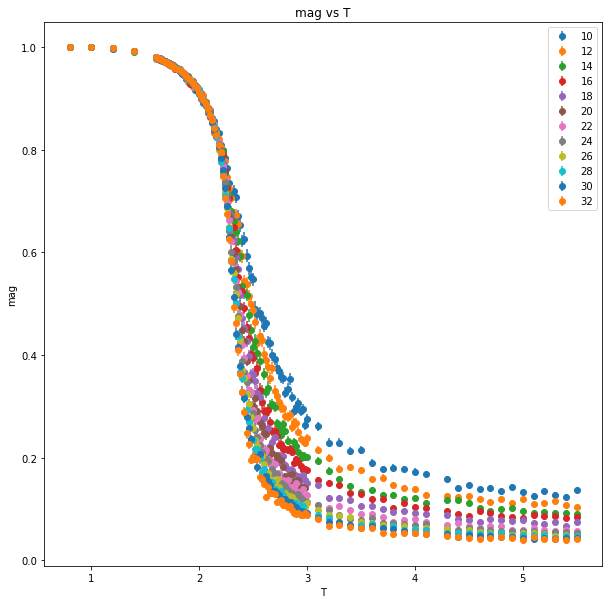

In [3]:
f,ax=plt.subplots(ncols=1,nrows=1,figsize=(10,10))
ax=[ax]
lbl='mag'
for i in extracted_vals.keys():
#     if i <30:
#         continue
    Y=[(k/i**2) for k in extracted_vals[i][lbl]]
    Y_err=[(k/i**2) for k in extracted_vals[i][lbl+"_err"]]
    ax[0].errorbar(extracted_vals[i]['T'],Y,Y_err,fmt='o',label=str(i))
    ax[0].set_xlabel('T')
    ax[0].set_ylabel(lbl)
    ax[0].set_title(lbl+ " vs T")
    ax[0].legend(loc=0)

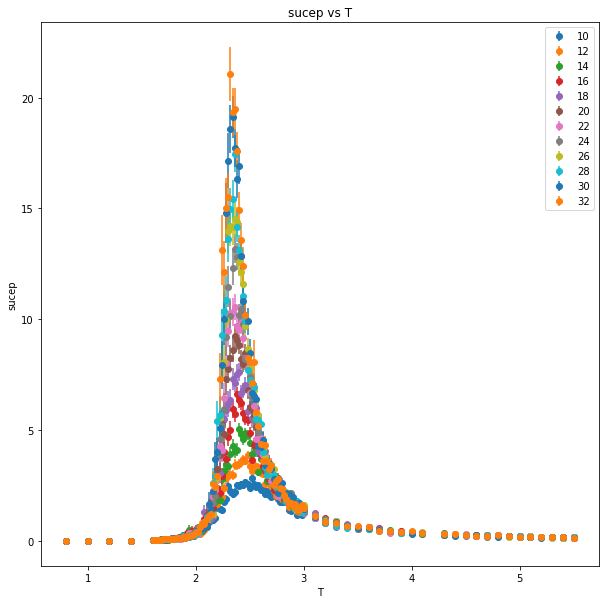

In [4]:
f,ax=plt.subplots(ncols=1,nrows=1,figsize=(10,10))
ax=[ax]
lbl='sucep'
for i in extracted_vals.keys():
#     if i <30:
#         continue
    ax[0].errorbar(extracted_vals[i]['T'],extracted_vals[i][lbl],extracted_vals[i][lbl+'_err'],fmt='o',label=str(i))
    ax[0].set_xlabel('T')
    ax[0].set_ylabel(lbl)
    ax[0].set_title(lbl+ " vs T")
    ax[0].legend(loc=0)


## Finite Size Scaling Methord

## Curve fitting 

In [5]:
f=open('cppanalysis/cfit_ising_all','r')
# f=open('DATA/critical_exps/cfit','r')
l=f.readline()
l=f.readline()
xi=[]
xi_err=[]
xiL=[]
xitemp=[]
while l:
    it=l[:-1].split(",")
    xiL.append(float(it[0]))
    xitemp.append(float(it[1]))
    xi.append(float(it[2]))
    xi_err.append(float(it[3]))
    l=f.readline()
reduced_temp=[(i-2.26)/2.26 for i in xitemp]

Xi_dic=dict()
for i,j,k,l in zip(xi,xi_err,xiL,reduced_temp):
    if k not in Xi_dic.keys():
        Xi_dic.update({k:{'temp':[],'sucep':[],'sucep_err':[]}})
    Xi_dic[k]['temp'].append(l)
    Xi_dic[k]['sucep'].append(i)    
    Xi_dic[k]['sucep_err'].append(j)   

    Leniarising the whole data set 

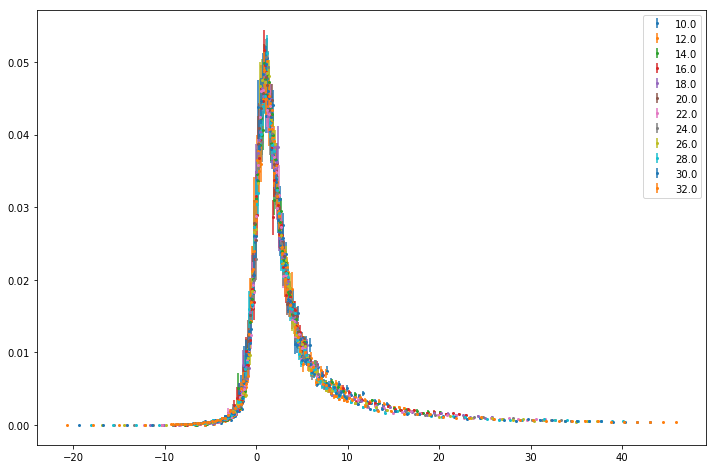

In [6]:
plt.figure(figsize=(12,8))
for k in Xi_dic.keys():
    x2=[i/k**1.75 for i in Xi_dic[k]['sucep']]
    x2_err=[i/k**1.75 for i in Xi_dic[k]['sucep_err']]
    x_ax=[k*i for i in Xi_dic[k]['temp']]
    rem=[]
#     for i in range(len(x_ax)):
#         if x_ax[i]<-5 or x_ax[i]>15:
#             rem.append(i)
#     while rem!=[]:
#         q=rem.pop()
#         x2.pop(q)
#         x2_err.pop(q)
#         x_ax.pop(q)
    plt.errorbar(x_ax,x2,x2_err,fmt='o',label=str(k),markersize=2)

plt.legend(loc=1)

In [7]:
dimen=dict()
for k in Xi_dic.keys():
    dimen.update({k:[k for i in Xi_dic[k]['temp']]})
ls=[]
temps=[]
xis=[]
xis_err=[]
for k in Xi_dic.keys():
    if k==38:
        continue
    for l,m,i,j in zip(Xi_dic[k]['sucep'],Xi_dic[k]['sucep_err'],Xi_dic[k]['temp'],dimen[k]):
        ls.append(j)
        temps.append(i)
        xis.append(l)
        xis_err.append(m)

    Ploting the whole dset

<Container object of 3 artists>

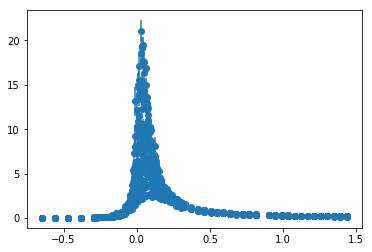

In [8]:
plt.errorbar(temps,xis,xis_err,fmt='o')

        FITTING FROM WHOLE DATA

In [9]:
def sucepFunc(var,gamma,neu,a,b,c):
    tc=2.26
    t=(var[1]-tc)/tc
    x=t*(var[0]**(1/neu))
    return (var[0])**(gamma/neu)*(a+b*x+c*x*x)

def rational_1_1(var,gamma,neu,a,b,c):
    tc=2.26
    t=(var[1]-tc)/tc
    x=t*(var[0]**(1/neu))
    return (var[0])**(gamma/neu)*(a+b*x+c*x*x)


In [10]:
len(ls)

1149

In [13]:
used_func=sucepFunc
temps2=[i*2.26+2.26 for i in temps]
cf=curve_fit(used_func,[ls,temps2],xis)
print("gamma = ",cf[0][0]," +/- ",sqrt(cf[1][0][0]))
print("neu = ",cf[0][1]," +/- ",sqrt(cf[1][1][1]))
print("tc = ",cf[0][2]," +/- ",sqrt(cf[1][2][2]))
for i in cf[0]:
    print("{0:0.3f}".format(i),end=",")
# print(matrix(cf[1]))

gamma =  40.92273275525586  +/-  151.1286070908781
neu =  45.10970780010053  +/-  166.59268739951324
tc =  0.17375100139072006  +/-  0.06452375641310736
40.923,45.110,0.174,0.176,-0.250,

<Container object of 3 artists>

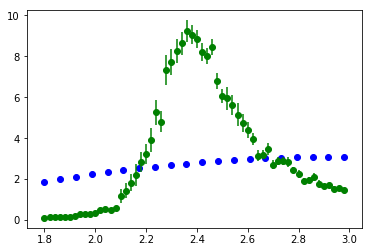

In [15]:
k=20
temps2=[i*2.26+2.26 for i in Xi_dic[k]['temp']]
x=linspace(min(temps2),max(temps2),20)
y=[used_func([k,i],40.923,45.110,0.174,0.176,-0.250) for i in x]
plt.scatter(x,y,c='b')
plt.errorbar(temps2,Xi_dic[k]['sucep'],Xi_dic[k]['sucep_err'],fmt='o',c='g')